# Caso de estudio. Análisis de Cargos de Servicios de Salud

## Configuración de librerias y carga de datos

In [ ]:
# Cargar librerías
import pandas as pd # Libreria para manejo de tablas

# 
import numpy as np # Libreria para computación científica
import scipy # Libreria para computación científica

# Modelos estadísticos
import statsmodels as stat # Librería para modelos estadísticos

# Visualización de datos
import matplotlib.pyplot as plt # Libreria base para visualización de datos
import seaborn as sns # Libreria de alto nivel para visualización de datos

In [ ]:
# Cargar datos
df = pd.read_excel('cargos-servicios-salud.xlsx')
df

,edad,sexo,imc,hijos,fumador,region,cargos
0,19,mujer,27.900,0,si,suroccidente,16884.92
1,18,hombre,33.770,1,no,suroriente,1725.55
2,28,hombre,33.000,3,no,suroriente,4449.46
3,33,hombre,22.705,0,no,noroccidente,21984.47
4,32,hombre,28.880,0,no,noroccidente,3866.86
...,...,...,...,...,...,...,...
1333,50,hombre,30.970,3,no,noroccidente,10600.55
1334,18,mujer,31.920,0,no,nororiente,2205.98
1335,18,mujer,36.850,0,no,suroriente,1629.83
1336,21,mujer,25.800,0,no,suroccidente,2007.94


In [ ]:
df.rename(columns={'age':'edad','sex':'sexo','bmi':'imc','smoker':'fumador','charges':'cargos','children':'hijos'}, inplace=True)
df

,edad,sexo,imc,hijos,fumador,region,cargos
0,19,female,27.900,0,yes,southwest,16884.92
1,18,male,33.770,1,no,southeast,1725.55
2,28,male,33.000,3,no,southeast,4449.46
3,33,male,22.705,0,no,northwest,21984.47
4,32,male,28.880,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.55
1334,18,female,31.920,0,no,northeast,2205.98
1335,18,female,36.850,0,no,southeast,1629.83
1336,21,female,25.800,0,no,southwest,2007.94


In [ ]:
df['sexo'].replace(['female','male'],['mujer','hombre'], inplace = True)
df['fumador'].replace(['yes','si'],['si','no'], inplace = True)
df['region'].replace(['southwest','southeast','northwest','northeast'],['suroccidente','suroriente','noroccidente','nororiente'], inplace = True)

In [ ]:
df.value_counts('sexo')

sexo
hombre    676
mujer     662
dtype: int64

In [ ]:
df.value_counts('fumador')

fumador
no    1064
si     274
dtype: int64

In [ ]:
df.value_counts('region')

region
suroriente      364
noroccidente    325
suroccidente    325
nororiente      324
dtype: int64

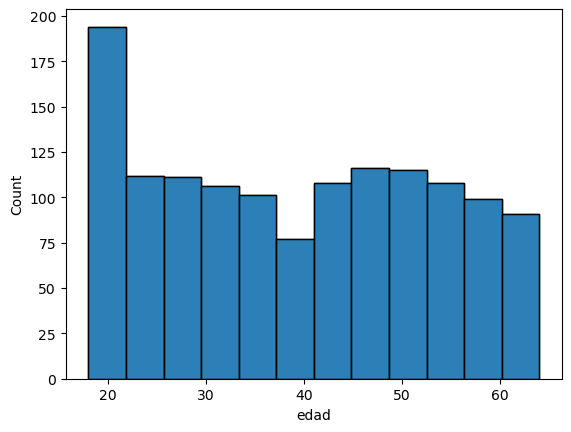

In [ ]:
sns.histplot(data=df, x='edad')
plt.show()

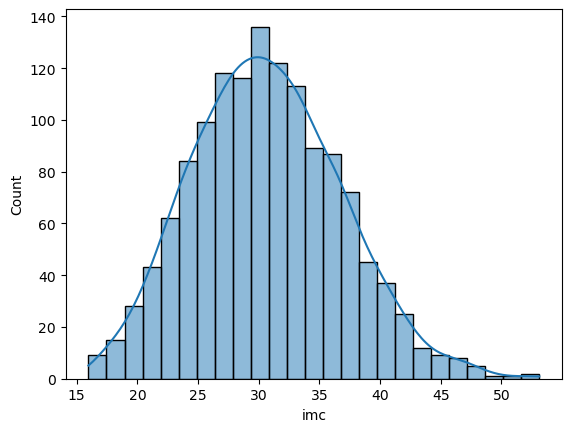

In [ ]:
sns.histplot(data=df, x='imc', kde=True)
plt.show()

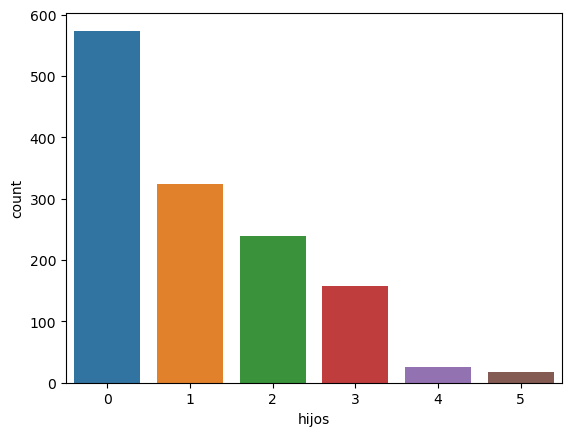

In [ ]:
sns.countplot(data=df, x='hijos')
plt.show()

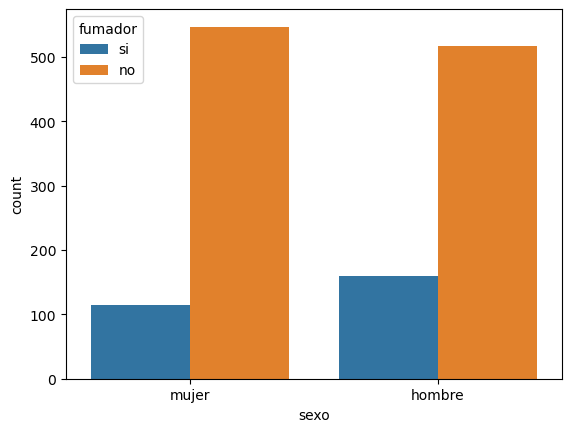

In [ ]:
sns.countplot(data=df, x='sexo', hue='fumador')
plt.show()

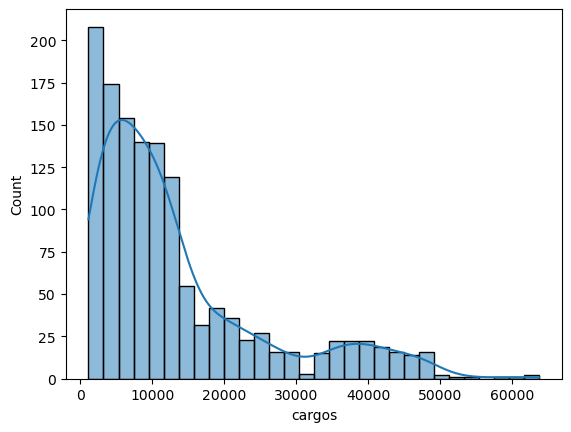

CPU times: user 276 ms, sys: 8.21 ms, total: 284 ms
Wall time: 288 ms


In [ ]:
%%time
sns.histplot(data=df, x='cargos', kde=True)
plt.show()

In [ ]:
df_mod = pd.get_dummies(df)

In [ ]:
y = df['cargos']
X = df[['edad','sexo','imc','hijos','fumador','region']]
X = pd.get_dummies(X)

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [61.  , 29.07,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
results = sm.OLS(y, X).fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 cargos   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:35:24   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
edad                  256.8563    

In [ ]:
y_cat = np.where(y > 30000, 1, 0)
y_cat

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
logit_mod = sm.Logit(y_cat, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.110909
         Iterations 10


In [ ]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1338
Model:                          Logit   Df Residuals:                     1329
Method:                           MLE   Df Model:                            8
Date:                Sun, 17 Oct 2021   Pseudo R-squ.:                  0.6995
Time:                        19:52:47   Log-Likelihood:                -148.40
converged:                       True   LL-Null:                       -493.81
Covariance Type:            nonrobust   LLR p-value:                6.772e-144
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
edad                    0.0228      0.011      2.084      0.037       0.001       0.044
imc                     0.3690      0.038      9.708      0.000       0.295       0.444
hijos           

In [ ]:
y_pred = np.where(logit_res.predict(X) > 0.5, 1, 0)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
pred = pd.DataFrame({'y_cat':y_cat,'y_pred':y_pred})
pred.value_counts(['y_cat','y_pred']).unstack('y_pred')

y_pred,0,1
y_cat,,
0,1164,12
1,19,143


In [ ]:
from statsmodels.stats import weightstats

In [ ]:
x = np.random.normal(loc=50, scale=4, size=30)
y = np.random.normal(loc=54, scale=4, size=30)
ztest = weightstats.CompareMeans(x,y)

In [ ]:
ztest.summary(use_t=False, alpha=0.05, usevar=)

<bound method CompareMeans.summary of <statsmodels.stats.weightstats.CompareMeans object at 0x7fb8c84cb340>>